In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

image=cv2.imread("homography_bot_red.jpg")
orig = image.copy()
show_img(image)

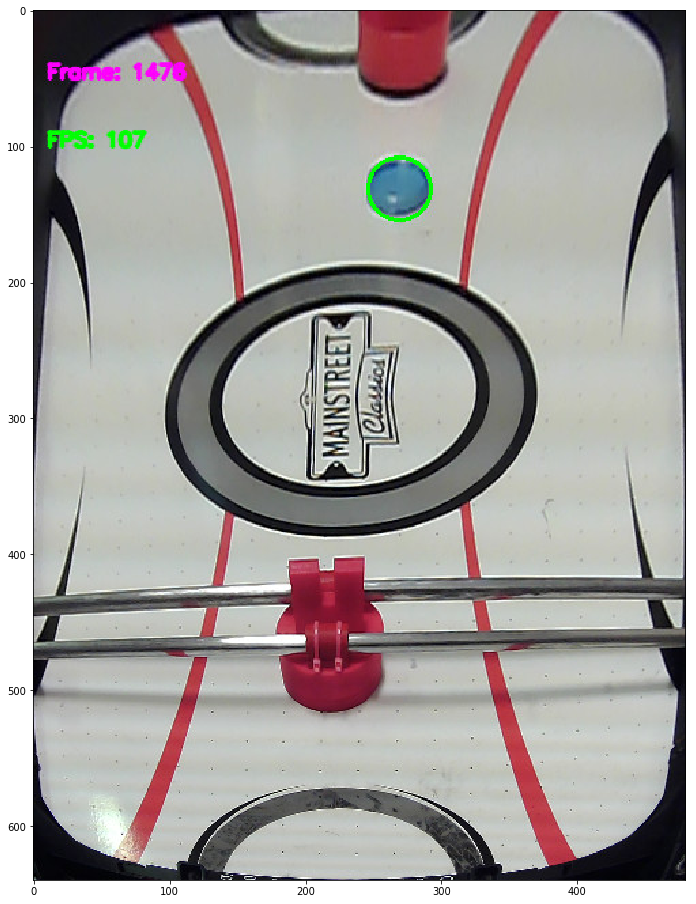

In [2]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_img(rgb)

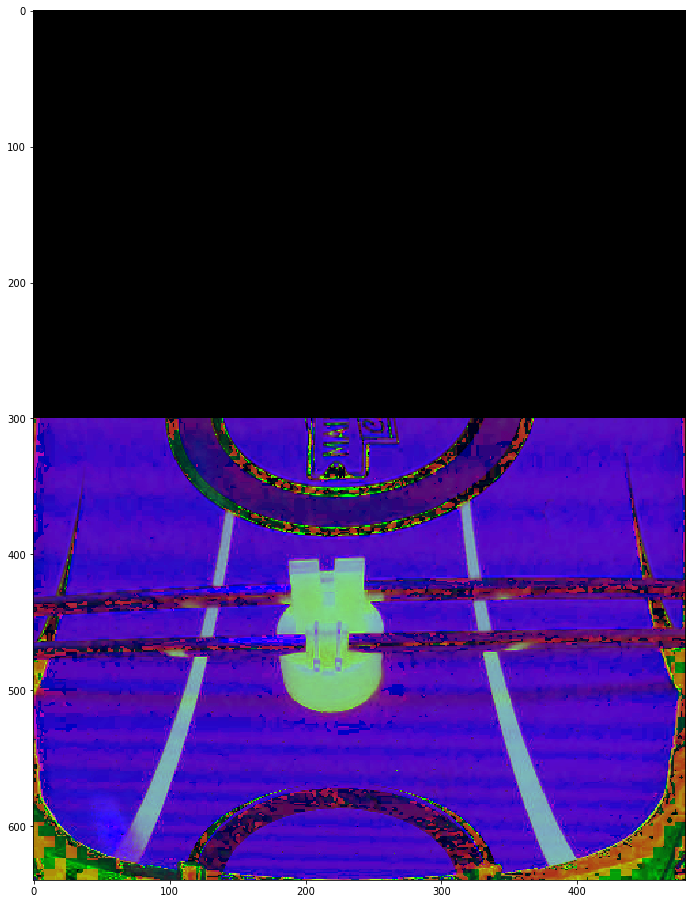

In [66]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

hsv[0:300,:,:] = 0

#show_img(hsv[430:500,205:230,:])
show_img(hsv)

In [67]:
hsv[430:500,205:230,:]

array([[[127, 210, 113],
        [127, 210, 113],
        [127, 208, 114],
        ..., 
        [128, 218, 117],
        [128, 215, 116],
        [128, 212, 114]],

       [[127, 211, 111],
        [127, 211, 111],
        [127, 209, 112],
        ..., 
        [128, 218, 117],
        [128, 212, 114],
        [128, 214, 112]],

       [[126, 209, 111],
        [126, 209, 111],
        [126, 209, 111],
        ..., 
        [128, 217, 113],
        [128, 216, 111],
        [128, 216, 111]],

       ..., 
       [[128, 204, 125],
        [128, 202, 126],
        [128, 201, 127],
        ..., 
        [127, 206, 124],
        [127, 206, 124],
        [127, 206, 124]],

       [[128, 206, 124],
        [128, 204, 125],
        [128, 202, 126],
        ..., 
        [128, 204, 125],
        [127, 204, 125],
        [127, 204, 125]],

       [[128, 204, 125],
        [128, 204, 125],
        [128, 204, 125],
        ..., 
        [128, 207, 127],
        [127, 203, 128],
        [127, 202,

In [68]:
botlowerBound=np.array([120,150,100])
botupperBound=np.array([130,255,150])

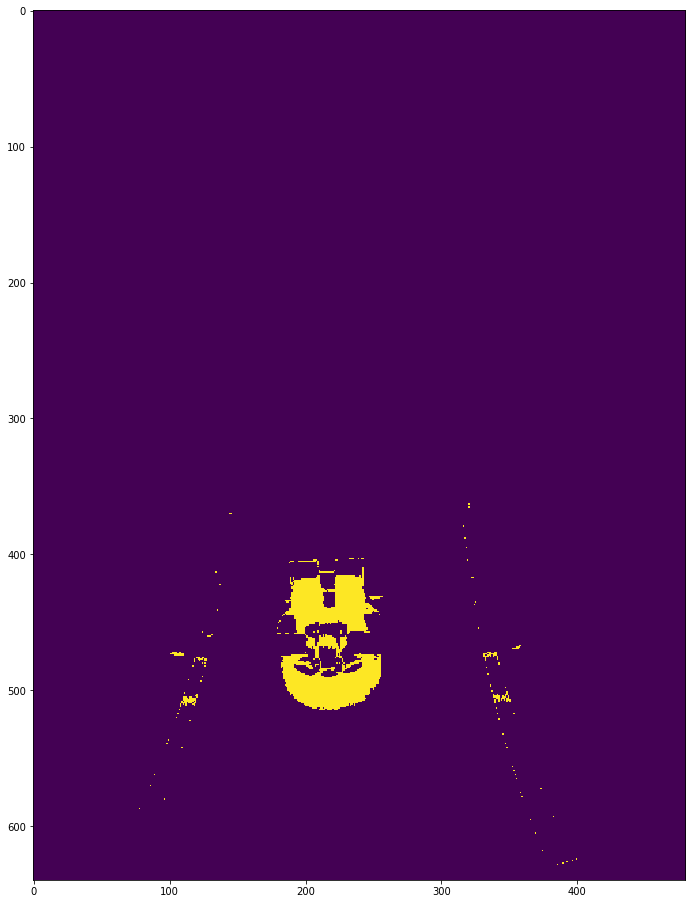

In [69]:
mask=cv2.inRange(hsv,botlowerBound,botupperBound)
show_img(mask)

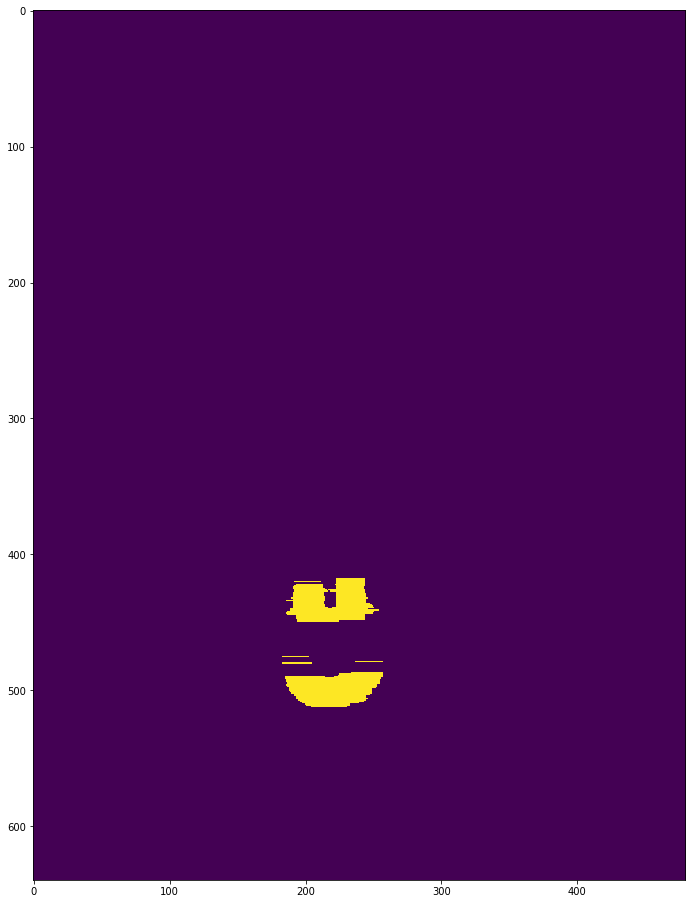

In [70]:
# we only want large objects since we are trying to detect
# the board. 1x60 is a good starting point. Can call again
# with override if the result is not good enough.
# this cleans up the outside noise
opened=cv2.morphologyEx(mask,cv2.MORPH_OPEN, np.ones((1,20)))
show_img(opened)

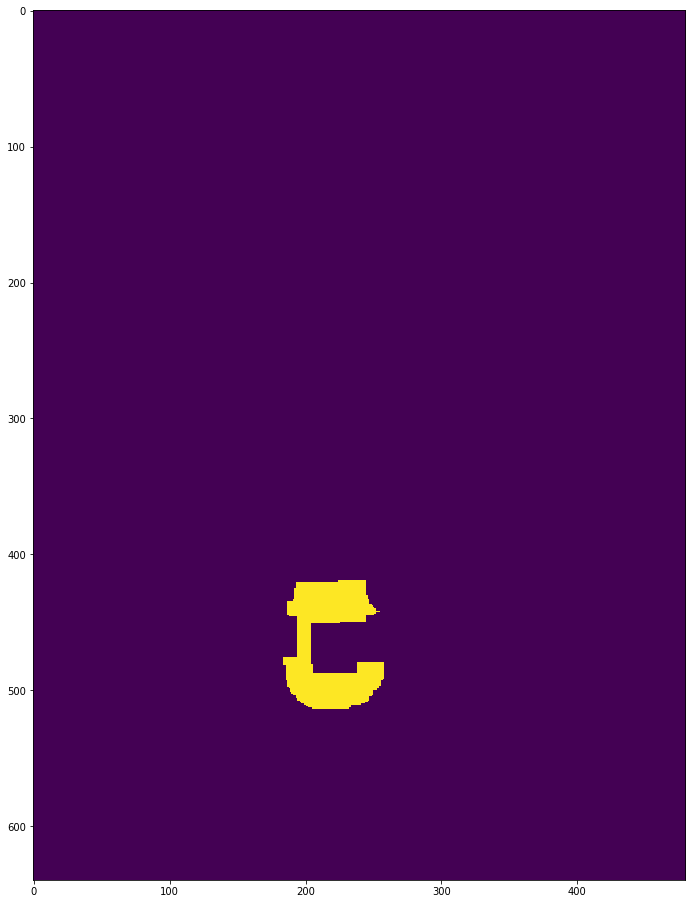

In [71]:
# this cleans up the noise on the inside and reduces the number of
# objects.
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((30,30)))
show_img(closed)

In [61]:
_, contours, _=cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE);

In [62]:
len(contours)

1

In [72]:
xs, ys = np.where(closed > 0)
pts = np.array(zip(ys, xs))

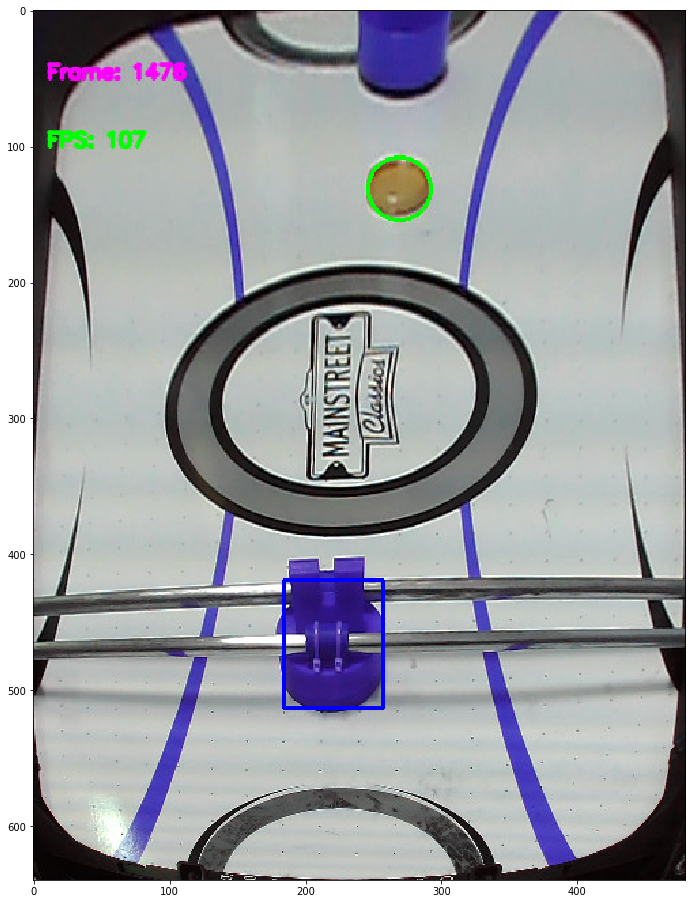

In [73]:
rect = cv2.minAreaRect(pts)
box = cv2.boxPoints(rect)
box = np.int0(box)

disp_img = image.copy()
cv2.drawContours(disp_img,[box],0,(0,0,255),2)
show_img(disp_img)

In [74]:
# convert points to tuple
rect_bot_left=tuple(box[0])
rect_top_left=tuple(box[1])
rect_top_right=tuple(box[2])
rect_bot_right=tuple(box[3])

In [75]:
center_x = rect_top_left[0] + ((rect_top_right[0] - rect_top_left[0])/2)
center_y = rect_top_left[1] + ((rect_bot_right[1] - rect_top_left[1])/2)

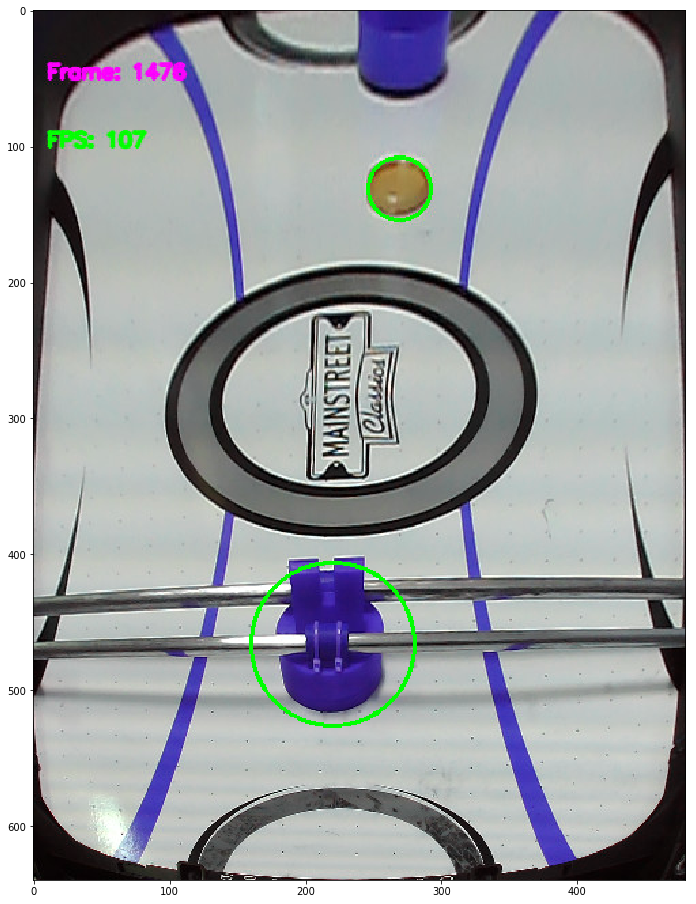

In [76]:
disp_img = image.copy()
img = cv2.circle(disp_img, (int(center_x), int(center_y)), 60, (0,255,0), 2)
show_img(disp_img)